In [58]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

def custom_func(ln_x, ln_q):
    x_val = (np.exp(1.5/( ( 0.1 * ((ln_x + 7)**2) ) + 1) )/(np.log(np.exp(ln_q) + 0.007) + 5) + np.exp(-1*(ln_x+12)/5) + 1)*((np.exp(0.5*ln_q))) + 5
    return x_val

data = pd.read_csv("./custom_func_data/6-points.csv")
data_4 = pd.read_csv("./custom_func_data/4-points.csv")


data_lh = pd.read_csv("./custom_func_data/lhapdf_3d.csv")
data['6_point_interpolator'] = data['xf']
data['4_point_interpolator'] = data_4['xf']


data_avg = pd.read_csv("./custom_func_data/avg_slope_inter.csv")


data['avg_slope_interpolator'] = data_avg['xf']

data['lhapdf'] = data_lh['xf']
    
data.drop('xf', axis = 1)

data['actual_function'] = custom_func(data['lnx'],data['lnq'])

data['6_point_ratio'] = data['6_point_interpolator']/data['actual_function']
data['4_point_ratio'] = data['4_point_interpolator']/data['actual_function']


data['avg_ratio'] = data['avg_slope_interpolator']/data['actual_function']
# data["lhapdf"] = data.lhapdf.astype(float)
data['lhapdf_ratio'] = data['lhapdf']/data['actual_function']

data

,lnx,lnq,xf,6_point_interpolator,4_point_interpolator,avg_slope_interpolator,lhapdf,actual_function,6_point_ratio,4_point_ratio,avg_ratio,lhapdf_ratio
0,-18.00,9.80,595.7437,595.7437,595.7437,595.7438,595.8855,595.321969,1.000708,1.000708,1.000709,1.000947
1,-17.99,9.80,594.8541,594.8541,594.8541,594.8543,594.9957,594.433103,1.000708,1.000708,1.000709,1.000946
2,-17.98,9.80,593.9664,593.9664,593.9664,593.9666,594.1078,593.546023,1.000708,1.000708,1.000709,1.000946
3,-17.97,9.80,593.0805,593.0805,593.0805,593.0807,593.2217,592.660724,1.000708,1.000708,1.000709,1.000947
4,-17.96,9.80,592.1965,592.1965,592.1965,592.1967,592.3374,591.777203,1.000709,1.000709,1.000709,1.000947
...,...,...,...,...,...,...,...,...,...,...,...,...
7955,-9.30,9.75,236.1596,236.1596,236.1596,236.1596,236.2259,235.982888,1.000749,1.000749,1.000749,1.001030
7956,-9.30,9.80,241.8736,241.8736,241.8736,241.8736,241.9295,241.748209,1.000519,1.000519,1.000519,1.000750
7957,-9.30,9.85,247.6988,247.6988,247.6988,247.6988,247.7352,247.657970,1.000165,1.000165,1.000165,1.000312
7958,-9.30,9.90,253.6478,253.6478,253.6478,253.6478,253.6579,253.715797,0.999732,0.999732,0.999732,0.999772


In [59]:
graphing = [data[i:i+1800].reset_index() for i in range(0,3600*2,1800)]
graphing

[      index    lnx  lnq        xf  6_point_interpolator  4_point_interpolator  \
 0         0 -18.00  9.8  595.7437              595.7437              595.7437   
 1         1 -17.99  9.8  594.8541              594.8541              594.8541   
 2         2 -17.98  9.8  593.9664              593.9664              593.9664   
 3         3 -17.97  9.8  593.0805              593.0805              593.0805   
 4         4 -17.96  9.8  592.1965              592.1965              592.1965   
 ...     ...    ...  ...       ...                   ...                   ...   
 1795   1795  -0.05  9.8  163.4422              163.4422              163.4422   
 1796   1796  -0.04  9.8  163.4104              163.4104              163.4104   
 1797   1797  -0.03  9.8  163.3787              163.3787              163.3787   
 1798   1798  -0.02  9.8  163.3471              163.3471              163.3471   
 1799   1799  -0.01  9.8  163.3155              163.3155              163.3155   
 
       avg_slo

In [60]:
graphing2 = [data[i:i+190].reset_index() for i in range(3600*2,3600*2+190*4,190)]
graphing2

[     index   lnx   lnq        xf  6_point_interpolator  4_point_interpolator  \
 0     7200 -17.8  0.50   10.6426               10.6426               10.6426   
 1     7201 -17.8  0.55   10.7830               10.7830               10.7830   
 2     7202 -17.8  0.60   10.9271               10.9271               10.9271   
 3     7203 -17.8  0.65   11.0746               11.0746               11.0745   
 4     7204 -17.8  0.70   11.2258               11.2258               11.2258   
 ..     ...   ...   ...       ...                   ...                   ...   
 185   7385 -17.8  9.75  564.3036              564.3036              564.3036   
 186   7386 -17.8  9.80  578.2890              578.2890              578.2890   
 187   7387 -17.8  9.85  592.5482              592.5482              592.5482   
 188   7388 -17.8  9.90  607.1128              607.1128              607.1128   
 189   7389 -17.8  9.95  622.0144              622.0144              622.0144   
 
      avg_slope_interpolat

In [71]:
ratio_list = ['6_point_ratio','4_point_ratio','avg_ratio', 'lhapdf_ratio']
interpolator_list = ['6_point_interpolator','4_point_interpolator','avg_slope_interpolator','lhapdf']
labels = ['6 point interpolator', '4 point interpolator', 'avg slope interpolator','lhapdf interpolator']
colors= ['blue', 'orange', 'purple', 'green']
index =7
index2 = 4
x = [1.000000e-08,1.214290e-08,1.474520e-08,1.790520e-08,2.174240e-08,2.640200e-08,3.206010e-08,3.893070e-08,4.727370e-08,5.740470e-08,6.970670e-08,8.464500e-08,1.027840e-07,1.248110e-07,1.515580e-07,1.840360e-07,2.234750e-07,2.713640e-07,3.295150e-07,4.001270e-07,4.858690e-07,5.899830e-07,7.164050e-07,8.699160e-07,1.056320e-06,1.282650e-06,1.557480e-06,1.892460e-06,2.297910e-06,2.790210e-06,3.387960e-06,4.113730e-06,4.995000e-06,6.065420e-06,7.365210e-06,8.943510e-06,1.086000e-05,1.318710e-05,1.601280e-05,1.944390e-05,2.361000e-05,2.866850e-05,3.481040e-05,4.226760e-05,5.132150e-05,6.231370e-05,7.565850e-05,9.185860e-05,1.115240e-04,1.353930e-04,1.643640e-04,1.995060e-04,2.421600e-04,2.939080e-04,3.566770e-04,4.327950e-04,5.250750e-04,6.369110e-04,7.726750e-04,9.367690e-04,1.135340e-03,1.375450e-03,1.665550e-03,2.015680e-03,2.437770e-03,2.945870e-03,3.556390e-03,4.288450e-03,5.164110e-03,6.208550e-03,7.450380e-03,8.921250e-03,1.065330e-02,1.268820e-02,1.506290e-02,1.781700e-02,2.098570e-02,2.461440e-02,2.873900e-02,3.338270e-02,3.857250e-02,4.433070e-02,5.066750e-02,5.758780e-02,6.509020e-02,7.316730e-02,8.180630e-02,9.099030e-02,1.006990e-01,1.109100e-01,1.215990e-01,1.327420e-01,1.443130e-01,1.562890e-01,1.686470e-01,1.813520e-01,1.944020e-01,2.077620e-01,2.214160e-01,2.353440e-01,2.495390e-01,2.639710e-01,2.786310e-01,2.935040e-01,3.085780e-01,3.238410e-01,3.392820e-01,3.548990e-01,3.706620e-01,3.865750e-01,4.026290e-01,4.188160e-01,4.351300e-01,4.515630e-01,4.681100e-01,4.847630e-01,5.015190e-01,5.183720e-01,5.353160e-01,5.523490e-01,5.694650e-01,5.866600e-01,6.039320e-01,6.212820e-01,6.386840e-01,6.561650e-01,6.737080e-01,6.913110e-01,7.089700e-01,7.266830e-01,7.444490e-01,7.622630e-01,7.801240e-01,7.980270e-01,8.159700e-01,8.339490e-01,8.519580e-01,8.699910e-01,8.880430e-01,9.060860e-01,9.240980e-01,9.420120e-01,9.596630e-01,9.764990e-01,9.901900e-01,9.965610e-01,9.985400e-01,9.993360e-01,9.997490e-01,1.000000e+00]
q = [1.300000e+00,1.501480e+00,1.754940e+00,2.077770e+00,2.494520e+00,3.040400e+00,3.766790e+00,4.750000e+00,6.133070e+00,8.090760e+00,1.092470e+01,1.512840e+01,2.153060e+01,3.156460e+01,4.778650e+01,7.491100e+01,1.219530e+02,2.068370e+02,3.667270e+02,6.822740e+02,1.337310e+03,2.773760e+03,6.116880e+03,1.441630e+04,3.651470e+04]
ln_x = np.log(x)
ln_q = np.log(q)

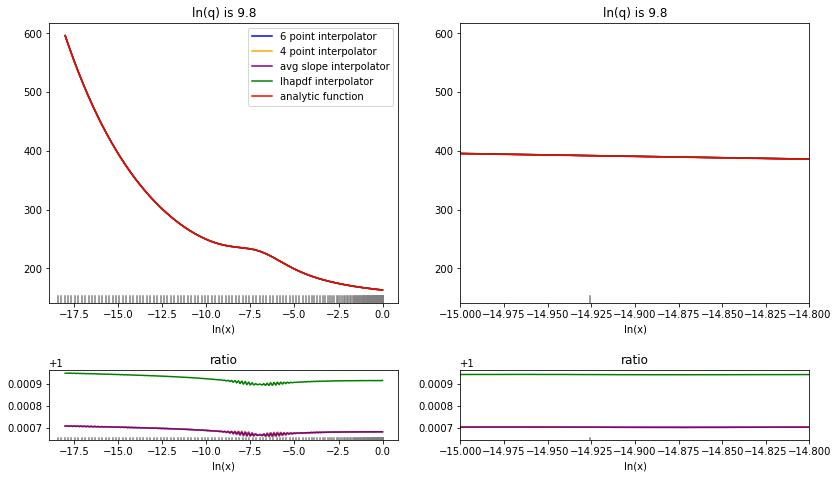

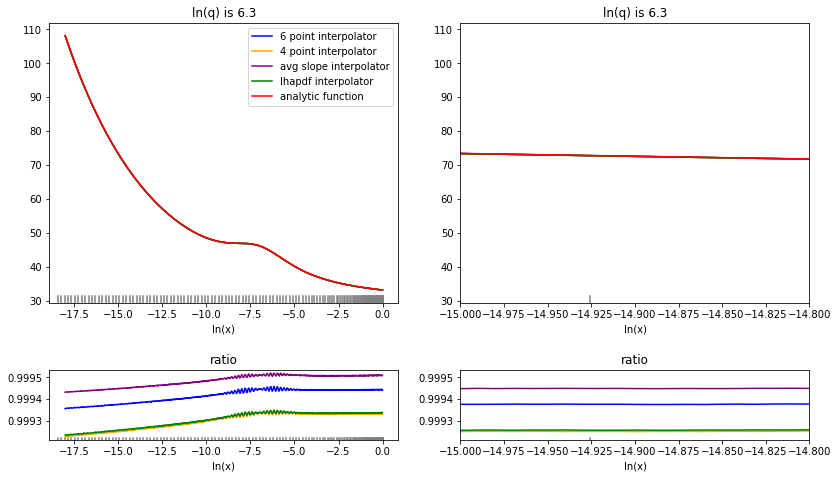

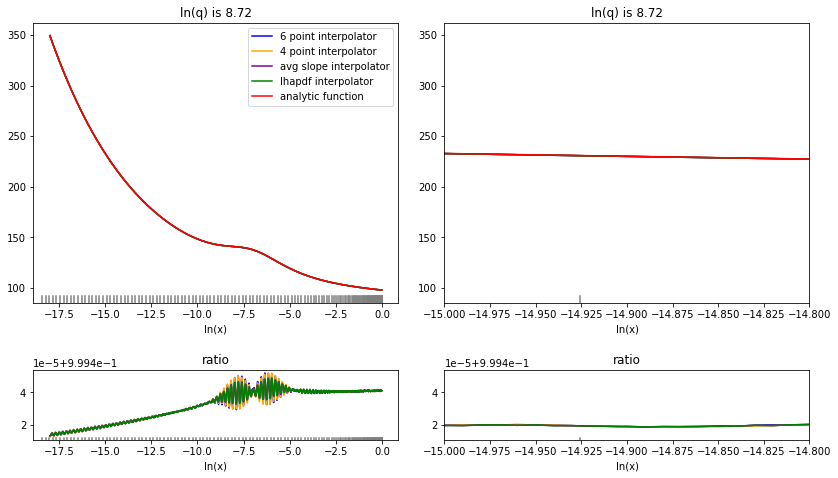

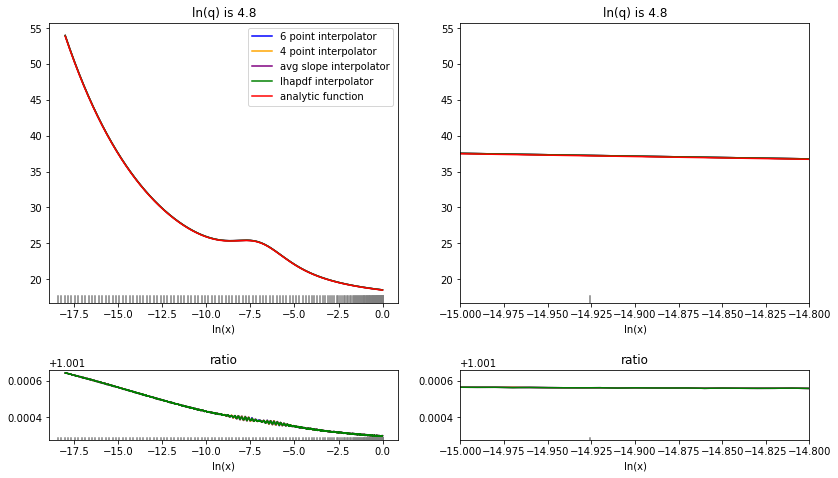

In [72]:
for dat in graphing:

    figure, axis = plt.subplots(2,2 , gridspec_kw={'height_ratios': [4, 1]})
    figure.set_size_inches(12, 7)
    for index in range(0,4):
        axis[0,0].plot(dat['lnx'], dat[interpolator_list[index]] , color=colors[index],  label = labels[index])
    axis[0,0].plot(dat['lnx'], dat['actual_function'] , color='red',   label = 'analytic function')
#     axis[0,0].plot(dat['lnx'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
    axis[0,0].legend()
    axis[0,0].set(xlabel = "ln(x)")
    axis[0,0].set_title("ln(q) is " + str(dat['lnq'][0]))
#         print("ln(q) is " , (dat['lnq'][0]))

#     i=-18
#     while(i<0):
#         axis[0,0].axvline(x=i,ymax = 0.025,color='grey')
#         i+=0.2
    for k in ln_x:
        axis[0,0].axvline(x=k,ymax = 0.025,color='grey')
    for index in range(0,4):
        axis[1,0].plot(dat['lnx'], dat[ratio_list[index]] , color=colors[index],  label = labels[index])
#     axis[1,0].plot(dat['lnx'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
#     axis[1,0].legend()
    axis[1,0].set_title("ratio")
    axis[1,0].set(xlabel = "ln(x)")
#         plt.xlim(-15,-14.8)
#     i=-18
#     while(i<0):
#         axis[1,0].axvline(x=i,ymax = 0.025,color='grey')
#         i+=0.2
#     axis[1,0].set_ylim([0.99999,1.00001])
    for k in ln_x:
        axis[1,0].axvline(x=k,ymax = 0.025,color='grey')
#         SECOND PART
    for index in range(0,4):
        axis[0,1].plot(dat['lnx'], dat[interpolator_list[index]] ,color=colors[index],  label = labels[index])
    axis[0,1].plot(dat['lnx'], dat['actual_function'] , color='red',   label = 'analytic function')
#     axis[0,1].plot(dat['lnx'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
#     axis[0,1].legend()
    axis[0,1].set(xlabel = "ln(x)")
    axis[0,1].set_title("ln(q) is " + str(dat['lnq'][0]))
    axis[0,1].set_xlim([-15,-14.8])
#     if(dat['lnq'][0]==6.3):
#         axis[0,1].set_ylim([71.5,73.5])
#     else:
#         axis[0,1].set_ylim([385,396])

#     i=-18
#     while(i<0):
#         axis[0,1].axvline(x=i,ymax = 0.025,color='grey')
#         i+=0.2
    for k in ln_x:
        axis[0,1].axvline(x=k,ymax = 0.025,color='grey')
    for index in range(0,4):
        axis[1,1].plot(dat['lnx'], dat[ratio_list[index]] ,color=colors[index],   label = labels[index])
#     axis[1,1].plot(dat['lnx'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
    axis[1,1].set_title("ratio")
    axis[1,1].set(xlabel = "ln(x)")
    axis[1,1].set_xlim([-15,-14.8])
#     axis[1,1].legend()
#     i=-18
#     while(i<0):
#         axis[1,1].axvline(x=i,ymax = 0.025,color='grey')
#         i+=0.2
#         axis[1,1].set_ylim([0.9,1.1])
    for k in ln_x:
        axis[1,1].axvline(x=k,ymax = 0.025,color='grey')
    figure.tight_layout(pad=2.0)
    plt.show()

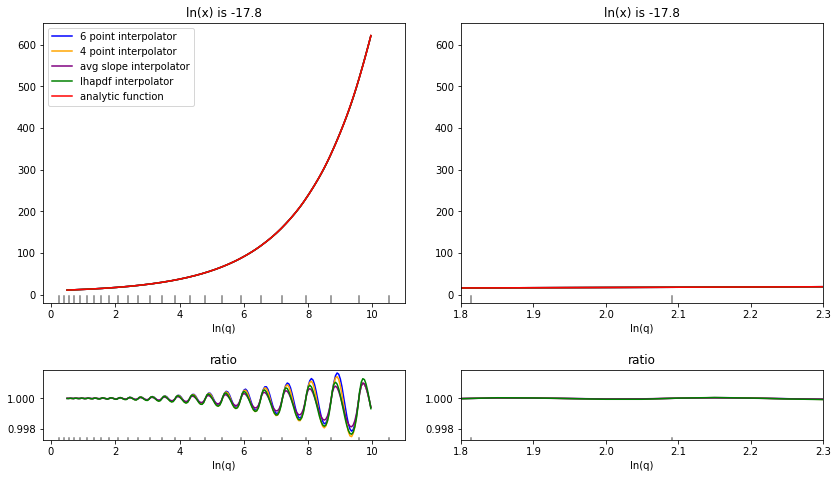

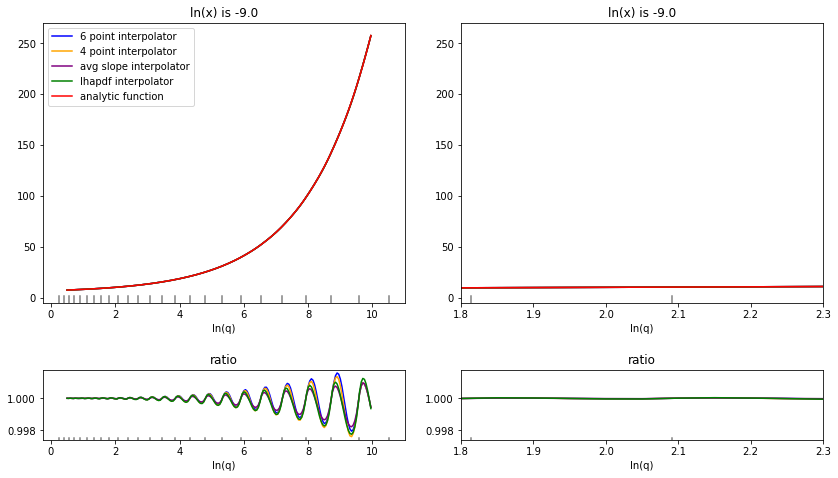

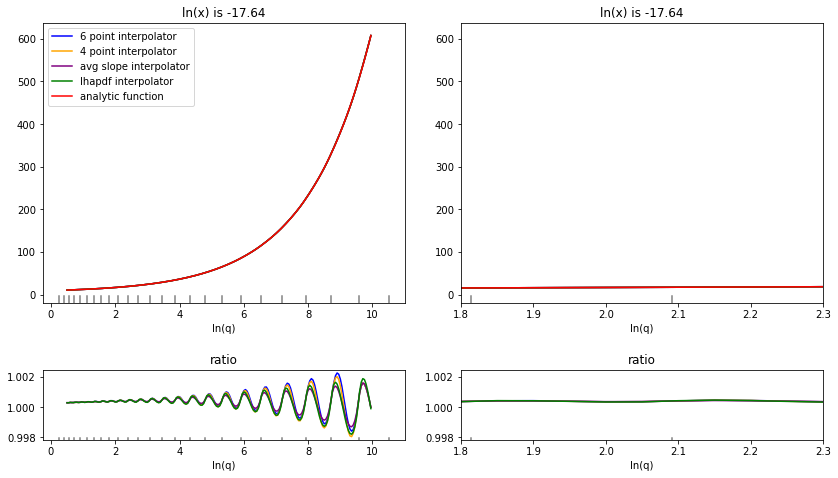

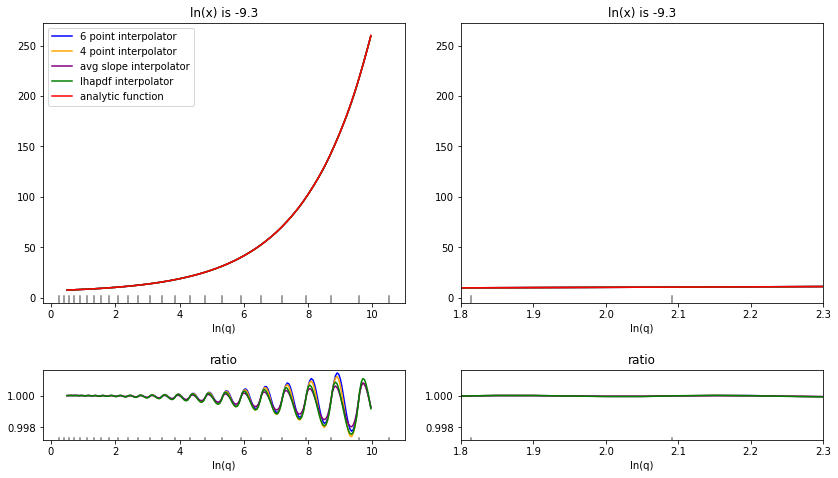

In [73]:
for dat in graphing2:
    if(True):
        figure, axis = plt.subplots(2,2 , gridspec_kw={'height_ratios': [4, 1]})
        figure.set_size_inches(12, 7)
        for index in range(0,4):
            axis[0,0].plot(dat['lnq'], dat[interpolator_list[index]] ,color=colors[index],   label = labels[index])
        axis[0,0].plot(dat['lnq'], dat['actual_function'] , color='red',   label = 'analytic function')
#         axis[0,0].plot(dat['lnq'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
        axis[0,0].legend()
        axis[0,0].set(xlabel = "ln(q)")
        axis[0,0].set_title("ln(x) is " + str(dat['lnx'][0]))
#         axis[0,0].set_ylim([-500,500])
#         print("ln(q) is " , (dat['lnq'][0]))

#         i=0.3
#         while(i<10):
#             axis[0,0].axvline(x=i,ymax = 0.025,color='grey')
#             i+=0.5
        for k in ln_q:
            axis[0,0].axvline(x=k,ymax = 0.025,color='grey')
        for index in range(0,4):
            axis[1,0].plot(dat['lnq'], dat[ratio_list[index]] ,color=colors[index],    label = labels[index])
#         axis[1,0].plot(dat['lnq'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
#         axis[1,0].legend()
        axis[1,0].set_title("ratio")
        axis[1,0].set(xlabel = "ln(q)")
#         plt.xlim(-15,-14.8)
#         i=0.3
#         while(i<10):
#             axis[1,0].axvline(x=i,ymax =0.025,color='grey')
#             i+=0.5
#         axis[1,0].set_ylim([0.999,1.001])
        for k in ln_q:
            axis[1,0].axvline(x=k,ymax = 0.025,color='grey')
#         SECOND PART
        for index in range(0,4):
            axis[0,1].plot(dat['lnq'], dat[interpolator_list[index]] ,color=colors[index],   label = labels[index])
        axis[0,1].plot(dat['lnq'], dat['actual_function'] , color='red',   label = 'analytic function')
#         axis[0,1].plot(dat['lnq'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
#         axis[0,1].legend()
        axis[0,1].set(xlabel = "ln(q)")
        axis[0,1].set_title("ln(x) is " + str(dat['lnx'][0]))
        axis[0,1].set_xlim([1.8,2.3])
#         if(dat['lnx'][0]==-17.8):
#             axis[0,1].set_ylim([15.5,19])
#         else:
#             axis[0,1].set_ylim([9.5,11.5])

#         i=0.3
#         while(i<10):
#             axis[0,1].axvline(x=i,ymax = 0.025,color='grey')
#             i+=0.5
        for k in ln_q:
            axis[0,1].axvline(x=k,ymax = 0.025,color='grey')
        for index in range(0,4):
            axis[1,1].plot(dat['lnq'], dat[ratio_list[index]] ,color=colors[index],  label = labels[index])
#         axis[1,1].plot(dat['lnq'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
#         axis[1,1].legend()
        axis[1,1].set_title("ratio")
        axis[1,1].set(xlabel = "ln(q)")
        axis[1,1].set_xlim([1.8,2.3])
#         i=0.3
#         while(i<10):
#             axis[1,1].axvline(x=i,ymax = 0.025,color='grey')
#             i+=0.5
#         axis[1,1].set_ylim([0.8,1.3])
        for k in ln_q:
            axis[1,1].axvline(x=k,ymax = 0.025,color='grey')
        figure.tight_layout(pad=2.0)
        plt.show()

In [70]:
ln_q

array([ 0.26236426,  0.40645129,  0.56243467,  0.7312952 ,  0.91409633,
        1.11198909,  1.32622318,  1.55814462,  1.81369544,  2.09072267,
        2.39102628,  2.71657377,  3.06947518,  3.45203624,  3.86674317,
        4.31630074,  4.80363572,  5.33193104,  5.9046177 ,  6.52543134,
        7.19841541,  7.92795908,  8.71880744,  9.57611479, 10.5054702 ,
       11.51292546])